# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [69]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split,KFold,GridSearchCV

Text(0.5, 1.0, 'Incorrect Number of Iris')

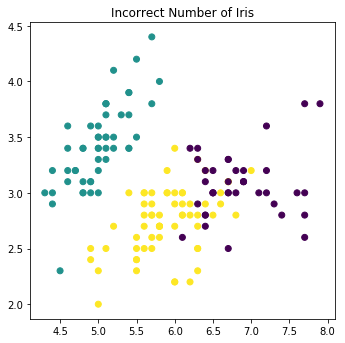

In [71]:
y_pred = KMeans(n_clusters= 3, init='k-means++', random_state=20).fit_predict(X)

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Iris")

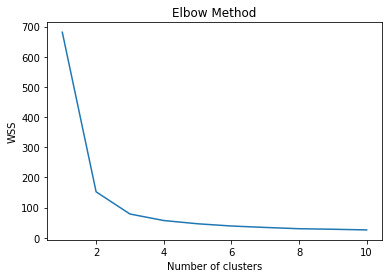

In [72]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [60]:
num_1 = []
for i in range(1,50):
    num_1.append(i)
    
num_2 = []
for i in range(1,50):
    num_2.append(i)

In [61]:
n_clusters = num_1
random_state = num_2
param_grid = dict(n_clusters=n_clusters, random_state=random_state)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(km, param_grid, scoring="accuracy", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(X,y)

C:\Users\xx\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 2401 candidates, totalling 7203 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2655 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 4715 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 6465 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 7180 out of 7203 | elapsed:   53.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 7203 out of 7203 | elapsed:   53.4s finished


In [62]:
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.973333 using {'n_clusters': 3, 'random_state': 20}
